# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
response_data_btc = requests.get(btc_url)
data_contents_btc = response_data_btc.content
data_contents_btc = response_data_btc.json()


In [6]:
response_data_eth= requests.get(eth_url)
data_contents_eth = response_data_eth.content
data_contents_eth = response_data_eth.json()


In [7]:
# Fetch current BTC price
btc_value = data_contents_btc['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_value = data_contents_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33891.60
The current value of your 5.3 ETH is $10307.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version='v2')

In [10]:
# Format current date as ISO format

today = pd.Timestamp('2023-04-20', tz='America/New_York').isoformat()

In [11]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [12]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [13]:
# Get current closing prices for SPY and AGG
investment_df = alpaca_api.get_bars(tickers, timeframe, start=today, end=today).df
investment_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-20 04:00:00+00:00,99.22,99.36,99.19,99.34,4823343,18648,99.285050,AGG
2023-04-20 04:00:00+00:00,411.21,413.70,410.27,411.88,74416130,532651,412.017289,SPY


In [14]:
# Reorganize the DataFrame
# Separate ticker data
AGG = investment_df[investment_df['symbol'] == 'AGG'].drop('symbol', axis=1)
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-04-20 04:00:00+00:00,99.22,99.36,99.19,99.34,4823343,18648,99.28505


In [15]:
SPY = investment_df[investment_df['symbol'] == 'SPY'].drop('symbol', axis=1)
SPY

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-04-20 04:00:00+00:00,411.21,413.7,410.27,411.88,74416130,532651,412.017289


In [16]:
# Concatenate the ticker DataFrames
investment_df = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

In [17]:
# Preview DataFrame
investment_df

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-04-20 04:00:00+00:00  99.22  99.36  99.19  99.34  4823343       18648   

                                        SPY                                   \
                               vwap    open   high     low   close    volume   
timestamp                                                                      
2023-04-20 04:00:00+00:00  99.28505  411.21  413.7  410.27  411.88  74416130   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-04-20 04:00:00+00:00      532651  412.017289

In [18]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = investment_df['AGG']['close'][0]
agg_close_price

99.34

In [19]:
spy_close_price = investment_df['SPY']['close'][0]
spy_close_price

411.88

In [20]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.34
Current SPY closing price: $411.88


In [21]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20594.00
The current value of your 200 AGG shares is $19868.00


### Savings Health Analysis

In [22]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
# Create savings DataFrame
df_savings = pd.DataFrame(
    data=[crypto,shares],
    index=['Crypto','Shares'],
    columns=['Amount']

)


# Display savings DataFrame
display(df_savings)

,Amount
Crypto,44198.881
Shares,40462.000


<AxesSubplot:ylabel='Amount'>

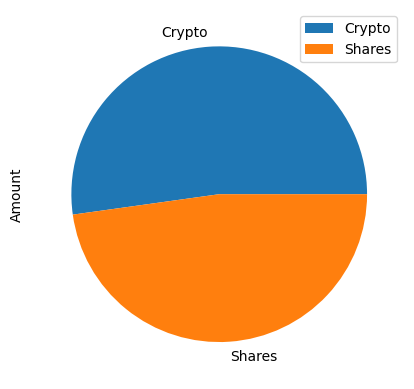

In [23]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount')

In [24]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
current_savings = crypto + shares
# Validate saving health
if current_savings > emergency_fund:
    print('Congratulations! You have enough money in your savings!!!')
elif current_savings == emergency_fund:
    print('Congratulations! You have Reached your financial goal!!!')
else:
    need_more = emergency_fund-current_savings
    print(f'You need ${need_more} to reach your goal.')
        

Congratulations! You have enough money in your savings!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
five_year = alpaca_api.get_bars(tickers, timeframe, start=start_date, end=end_date).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG_5 = five_year[five_year['symbol'] == 'AGG'].drop('symbol', axis=1)
AGG_5

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967
...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,114.74,114.8015,114.6500,114.650,3480303,13520,114.706244
2021-04-27 04:00:00+00:00,115.13,115.1300,114.3700,114.370,3820640,12720,114.498315
2021-04-28 04:00:00+00:00,114.45,114.4685,114.2000,114.430,7075831,24303,114.379810


In [41]:
SPY_5 = five_year[five_year['symbol'] == 'SPY'].drop('symbol', axis=1)
SPY_5

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2016-05-02 04:00:00+00:00,206.92,208.18,206.4100,207.9700,61908515,263580,207.294812
2016-05-03 04:00:00+00:00,206.52,206.80,205.2800,206.1592,106422142,377518,206.312060
2016-05-04 04:00:00+00:00,204.99,205.85,204.4200,205.0100,92199810,345261,205.090172
2016-05-05 04:00:00+00:00,205.56,205.98,204.4700,204.9700,67597222,280622,205.141555
2016-05-06 04:00:00+00:00,204.08,205.77,203.8800,205.7200,89131004,340335,204.937074
...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.44,418.22,416.8111,417.6100,51824860,295870,417.508245
2021-04-27 04:00:00+00:00,417.93,418.14,416.3000,417.5200,50297139,296300,417.481360
2021-04-28 04:00:00+00:00,417.81,419.01,416.9000,417.4000,50692781,330049,417.742098


In [54]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG_5,SPY_5], axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                                    \
              open      high       low    close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                           SPY                                       \
                  vwap    open    high     low     close     volume   
2016-05-02  110.627199  206.92  208.18  206.41  207.9700   61908515   
2016-05-03  110.865995  206.52  206.80  205.28  206.1592  106422142   
2016-05-04  110.879063  204.99  205.85  204.42  205.0100   92199810   
2016-05-05  111.028363  205.56  205.98  204.47  204.9700   67597222   
2016-05-06  111.031967  204.08  205.77  203.88  205.7200   89131004   

                                    
           trade_count        vwap  
2016-05-02      263580  207.294812  
2016-05-03      377518  206.312060  
2016-05-04      345261  205.090172  
2016-05-05      280622  205.141555  
2016-05-06      340335  204.937074

In [73]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30,
)


In [71]:
# Printing the simulation input data
MC_30.portfolio_data.head()

AGG                                                    \
              open      high       low    close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.605  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.810  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.860  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.140  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.970  2718710       12697   

                                        SPY                            \
                  vwap daily_return    open    high     low     close   
2016-05-02  110.627199          NaN  206.92  208.18  206.41  207.9700   
2016-05-03  110.865995     0.001853  206.52  206.80  205.28  206.1592   
2016-05-04  110.879063     0.000451  204.99  205.85  204.42  205.0100   
2016-05-05  111.028363     0.002526  205.56  205.98  204.47  204.9700   
2016-05-06  111.031967    -0.001530  204.08  205.77  203.88  205.7200   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.008707  
2016-05-04   92199810      345261  205.090172    -0.005574  
2016-05-05   67597222      280622  205.141555    -0.000195  
2016-05-06   89131004      340335  204.937074     0.003659

In [74]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Branzil\desktop\Alpaca\pyviz\Mod5HW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985298,0.986221,1.001980,0.997279,1.003191,0.987254,1.006292,0.987848,1.001906,0.995071,...,0.992636,0.991722,1.001454,1.000342,0.997416,0.992252,0.987366,0.991583,0.994657,0.990004
2,0.978245,0.988377,1.002920,0.992532,0.998951,0.980439,1.012927,0.993919,1.004175,0.988453,...,0.980279,0.987711,1.001382,1.001361,1.002765,1.000349,0.994676,0.978920,1.005323,0.992930
3,0.977280,0.993391,1.005109,0.987258,1.004048,0.983026,1.001015,1.000036,1.005228,1.004203,...,0.979933,0.985882,1.012191,1.012143,1.004317,0.990769,1.005957,0.990282,1.007008,1.002009
4,0.973198,0.986792,0.999136,0.986313,1.001823,0.988014,0.995715,1.007547,1.004975,1.006021,...,0.979821,0.987509,1.014182,1.009564,1.006188,0.999629,1.009916,0.986495,1.016879,0.996682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.022133,9.818919,27.703801,24.064927,37.855481,12.659042,12.844894,18.160719,13.373920,7.547684,...,24.178178,16.704462,5.290522,13.659515,17.071354,3.610347,14.299128,7.527681,5.897894,11.405133
7557,11.027462,9.841688,27.381091,24.092759,38.255087,12.595358,12.823097,18.082283,13.259845,7.539562,...,24.037213,16.637122,5.282400,13.502821,17.097873,3.636419,14.213314,7.571700,5.914685,11.468178
7558,10.921400,9.975709,27.452278,23.946583,38.144429,12.581567,12.944908,18.172068,13.166168,7.543383,...,24.153574,16.824227,5.302927,13.531780,17.024096,3.623018,14.335061,7.516031,5.886959,11.404193
7559,10.937674,9.960660,27.636814,23.647782,38.084566,12.575874,12.845712,18.131494,13.203487,7.536546,...,24.039576,16.880817,5.309539,13.535033,16.842466,3.613243,14.592794,7.561381,5.894323,11.467492


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

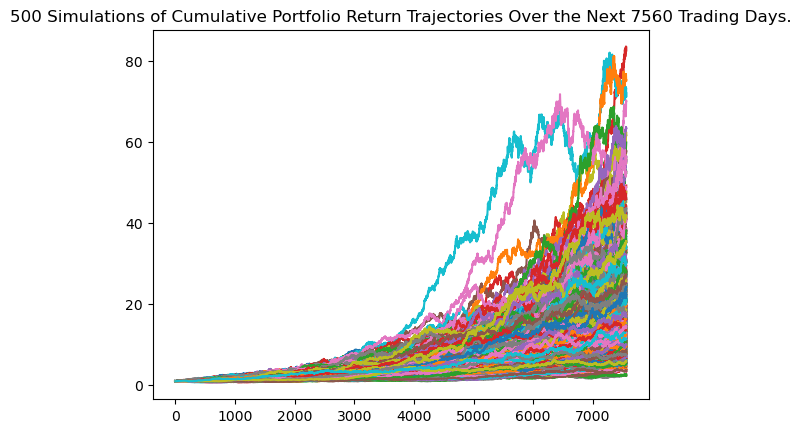

In [77]:
# Plot simulation outcomes
MC_30_sim = MC_30.plot_simulation()
MC_30_sim

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

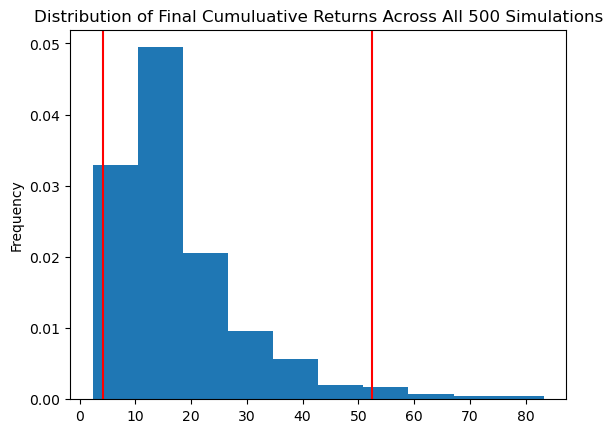

In [78]:
# Plot probability distribution and confidence intervals
MC_30_dist = MC_30.plot_distribution()
MC_30_dist

### Retirement Analysis

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30.summarize_cumulative_return()
# Print summary statistics
summary_stats

count           500.000000
mean             17.955029
std              12.020621
min               2.361523
25%              10.018469
50%              15.001808
75%              22.399720
max              83.251874
95% CI Lower      4.145990
95% CI Upper     52.484210
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [84]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary_stats[8]*initial_investment
ci_upper = summary_stats[9]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82919.80498085526 and $1049684.194239798


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [85]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = summary_stats[8]*initial_investment
ci_upper = summary_stats[9]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124379.70747128288 and $1574526.2913596972


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


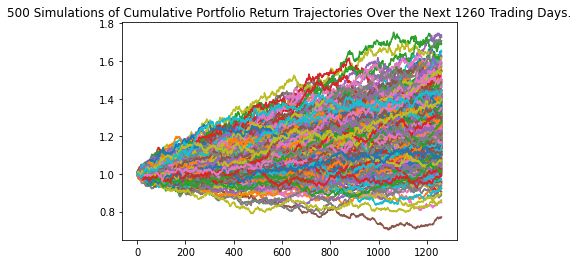

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

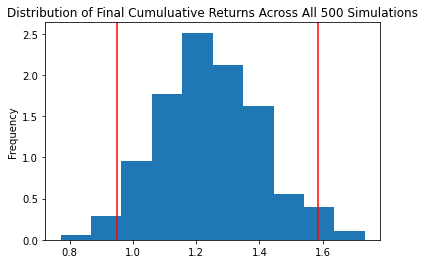

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


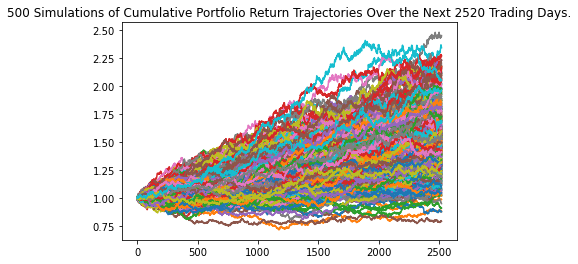

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

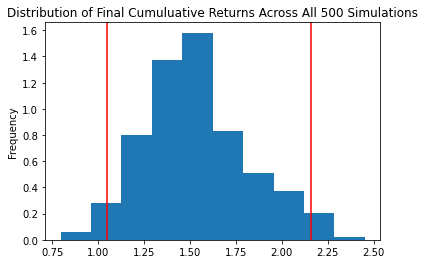

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
